In [ ]:
# imports - processing, models, metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import f1_score, log_loss, accuracy_score

from scipy.stats import entropy

In [ ]:
# read in data
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

## read in files and combine into 1 dataframe
states = ['CA', 'TX', 'AZ', 'CO', 'NY', 'KS', 'NC', 'GA', 'FL', 'OR', 'MT', 'AL']
Fires = pd.DataFrame()
for state in states:
  path = '/content/drive/MyDrive/DS 440/Final Report/Data/Big' + state + '.csv'
  df = pd.read_csv(path)
  Fires = Fires.append(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#########################################
# pseudocode for training and evaluating national model

# Model Experiment = DataFrame

# for model
#   fit model
#   make predictions
#   evaluate predictions
#   store: model obj, model type, f1 score, trained nationally, evaluated nationally



#########################################
# pseudocode for training and evaluating state models

# for state
#   for model
#     fit model
#     make predictions
#     evaluate predictions
#     store: model obj, model type, f1 score, trained by state, evaluated by state



##########################################
# pseudocode for evaluating national models on states

# for state
#   for model
#     make predictions on state using a national model
#     evaluate predictions
#     store: model obj, model type, f1 score, trained nationally, evaluated by state



##########################################
############ RETHINK THIS ################
##########################################
# pseudocode for evaluating national and state models on states

# for state
#   for model
#     make predictions on state with national or state model - whichever is best
#     evaluate predictions
#     store: model obj, model type, f1 score, trained nationally, evaluated by state

####################################################################################

# See results of this

# mean f1-score on national model on nation
# mean f1-score on states by national model
# mean f1-score on states by state model
# mean f1-score on states by national and state combo

# plot f1-scores on states by national model + hline for mean
# plot f1-scores on states by state models + hline for mean
# plot f1-scores on states by combo of models + hline for mean

In [ ]:
# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

# select features
input_features = ['LATITUDE','LONGITUDE',\
                  'DISCOVERY_MONTH','DAYS_TO_CONT']

# split into train and test
X_train = Fires[Fires['FIRE_YEAR'] < 2018][input_features].copy()
y_train = Fires[Fires['FIRE_YEAR'] < 2018][output_feature].copy()
X_test = Fires[Fires['FIRE_YEAR'] == 2018][input_features].copy()
y_test = Fires[Fires['FIRE_YEAR'] == 2018][output_feature].copy()

# keep track of experiments
ModelsExperiments = pd.DataFrame(columns=['model_type','f1','model_obj',\
                                          'trained_by','eval_by'])

# model list
models = [LogisticRegression(), KNeighborsClassifier(), \
          AdaBoostClassifier(), RandomForestClassifier(), \
          GradientBoostingClassifier(), DecisionTreeClassifier()] # SVC


# train models
for model in models:
  start = time.time()

  # train model
  clf = model.fit(X_train,y_train)

  # make predictions
  y_pred = clf.predict(X_test)

  # evaluate predictions
  f1 = f1_score(y_test,y_pred)

  # store results in DataFrame
  row = {'model_type':model,'model_obj':clf,'f1':f1,\
         'trained_by':'National','eval_by':'National'}
  row_df = pd.DataFrame([row],columns=row.keys())
  ModelsExperiments = pd.concat([ModelsExperiments,row_df])
  #ModelsExperiments.reset_index(inplace=True)

  # print results to output
  print(str(model), 'f1-score: ',f1) 
  end = time.time()
  print('time to train ',str(model),' =',str(end-start))
  print()



LogisticRegression() f1-score:  0.5875016762773233
time to train  LogisticRegression()  = 1.2931430339813232

KNeighborsClassifier() f1-score:  0.6875623585525514
time to train  KNeighborsClassifier()  = 1.9925777912139893

AdaBoostClassifier() f1-score:  0.6866362926976616
time to train  AdaBoostClassifier()  = 6.0677642822265625

RandomForestClassifier() f1-score:  0.7128114049824799
time to train  RandomForestClassifier()  = 41.68354320526123

GradientBoostingClassifier() f1-score:  0.7052434087093908
time to train  GradientBoostingClassifier()  = 19.76398229598999

DecisionTreeClassifier() f1-score:  0.6597653876711689
time to train  DecisionTreeClassifier()  = 0.9972264766693115



In [ ]:
ModelsExperiments['f1'].mean()

0.6732534214817627

Tree-based ensemble: 0.7008

# National Baseline with weather

In [ ]:
# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

# remove fill value
FiresNew = Fires[Fires['aet'] != 32768.].copy()

# select features
input_features = ['LATITUDE','LONGITUDE',\
                  'DISCOVERY_MONTH','aet', 'pet', 'soil',\
                  'def', 'ppt', 'q',  'vap', 'ws', 'vpd', 'swe'] 
# PDSI, tmax, tmin, srad, 'DAYS_TO_CONT', 

# split into train and test
X_train = FiresNew[FiresNew['FIRE_YEAR'] < 2018][input_features].copy()
y_train = FiresNew[FiresNew['FIRE_YEAR'] < 2018][output_feature].copy()
X_test = FiresNew[FiresNew['FIRE_YEAR'] == 2018][input_features].copy()
y_test = FiresNew[FiresNew['FIRE_YEAR'] == 2018][output_feature].copy()

# keep track of experiments
ModelsExperiments = pd.DataFrame(columns=['model_type','f1','model_obj',\
                                          'trained_by','eval_by'])

# model list
models = [LogisticRegression, KNeighborsClassifier, \
          AdaBoostClassifier, RandomForestClassifier, \
          GradientBoostingClassifier, DecisionTreeClassifier] # SVC

# train models
for model in models:
  start = time.time()

  # train model
  clf = model().fit(X_train,y_train)

  # make predictions
  y_pred = clf.predict(X_test)

  # evaluate predictions
  f1 = f1_score(y_test,y_pred)

  # store results in DataFrame
  row = {'model_type':str(model),'model_obj':clf,'f1':f1,\
         'trained_by':'National','eval_by':'National'}
  row_df = pd.DataFrame([row],columns=row.keys())
  ModelsExperiments = pd.concat([ModelsExperiments,row_df])
  #ModelsExperiments.reset_index(inplace=True)

  # print results to output
  print(str(model), 'f1-score: ',f1) 
  end = time.time()
  print('time to train ',str(model),' =',str(end-start))
  print()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.5735623181919892
time to train  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 4.44303822517395

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.6504702194357367
time to train  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 4.3682541847229

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.7375626795875824
time to train  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 7.159215450286865

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.7673208528929361
time to train  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 21.928264379501343

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.7563463680600341
time to train  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  = 24.17380714416504

<class 'sklearn.tree._classes.DecisionTreeClassifier'> f1-s

tree-based ensemble: .7539

In [ ]:
ModelsExperiments['f1'].mean()

0.6932410247921269

In [ ]:
ModelsExperiments

,model_type,f1,model_obj,trained_by,eval_by
0,<class 'sklearn.linear_model._logistic.Logisti...,0.573562,LogisticRegression(),National,National
0,<class 'sklearn.neighbors._classification.KNei...,0.650470,KNeighborsClassifier(),National,National
0,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.737563,"(DecisionTreeClassifier(max_depth=1, random_st...",National,National
0,<class 'sklearn.ensemble._forest.RandomForestC...,0.767321,"(DecisionTreeClassifier(max_features='auto', r...",National,National
0,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.756346,([DecisionTreeRegressor(criterion='friedman_ms...,National,National
0,<class 'sklearn.tree._classes.DecisionTreeClas...,0.674184,DecisionTreeClassifier(),National,National


In [ ]:
type(ModelsExperiments['model_type'].unique()[0])

str

# Train and evaluate by state

In [ ]:
# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

# remove fill value
FiresNew = Fires[Fires['aet'] != 32768.].copy()

# select features
input_features = ['LATITUDE','LONGITUDE',\
                  'DISCOVERY_MONTH', 'aet', 'pet', 'soil',\
                  'def', 'ppt', 'q',  'vap', 'ws', 'vpd', 'swe'] 
# PDSI, tmax, tmin, srad, 'DAYS_TO_CONT',


states = list(Fires['STATE'].unique())

# model list
models = [LogisticRegression, KNeighborsClassifier, \
          AdaBoostClassifier, RandomForestClassifier, \
          GradientBoostingClassifier, DecisionTreeClassifier] # SVC

# train models
for state in states:
  print(state)

  # split into train and test by state
  FiresByState = Fires[Fires['STATE'] == state].copy()
  X_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][input_features].copy()
  y_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][output_feature].copy()
  X_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][input_features].copy()
  y_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][output_feature].copy()
  
  # train and evaluate by model
  for model in models:
    # set timer
    start = time.time()

    # train model
    clf = model().fit(X_train,y_train)

    # make predictions
    y_pred = clf.predict(X_test)

    # evaluate prediction
    f1 = f1_score(y_test,y_pred)
    
    # store results
    row = {'model_type':str(model),'model_obj':clf,'f1':f1,\
           'trained_by':state,'eval_by':'state'}

    row_df = pd.DataFrame([row],columns=row.keys())
    ModelsExperiments = pd.concat([ModelsExperiments,row_df])

    # print results to output
    print(str(model), 'f1-score: ',f1) 
    end = time.time()
    print('time to predict and evaluate ',str(model),' =',str(end-start))
    print()

CA
<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.0
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.08652448654174805

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.37635615413393186
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.45480775833129883

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.10142815505683475
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 1.1156527996063232

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.37630792227204785
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 4.382535696029663

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.08747753145596165
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  = 2.72

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.8997297889432557
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.5396332740783691

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.8694625855692816
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.44849324226379395

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.8975077422209115
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 1.317218542098999

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.9017306245297215
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 3.538241386413574

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.8977914740626606
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.002190580503833516
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.2354888916015625

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.2531860662701784
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.4928908348083496

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.22152886115444617
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.6135106086730957

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.32156862745098036
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.4207258224487305

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.2490149724192277
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifie

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.0
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.33594560623168945

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.12862318840579712
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.31773877143859863

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.05399568034557235
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.7640693187713623

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.1227364185110664
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.9563796520233154

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.10071942446043165
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  = 2.17596

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.603182256509161
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.26933789253234863

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.6109271523178809
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.25667524337768555

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.611140867702196
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.610098123550415

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.6936148300720906
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.5961530208587646

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.6763787721123828
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.3763440860215054
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.25385451316833496

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.5928481806775407
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.22435498237609863

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.6288182659672941
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.6583006381988525

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.6001362397820164
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.7723588943481445

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.6314503816793894
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.8648291069459757
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.28896379470825195

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.8042043510144219
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.19230103492736816

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.8476607513251901
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.6143810749053955

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.8528735632183908
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.6489343643188477

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.8556442417331813
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.8754409769335142
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.22142457962036133

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.8646239554317551
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.146803617477417

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.8632454923717059
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.5102908611297607

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.8753056234718828
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 1.017094612121582

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.875067897881586
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  =

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.5468861846814603
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.20089435577392578

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.49688581314878894
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.14334416389465332

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.609129814550642
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.41354918479919434

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.6358208955223881
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 0.9805760383605957

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.6103993971363979
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.9454756380510441
time to predict and evaluate  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.17505884170532227

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.881948782011243
time to predict and evaluate  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.08833670616149902

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.9328621908127209
time to predict and evaluate  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.42939090728759766

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.934040047114252
time to predict and evaluate  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 0.9919979572296143

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.940901111761264
time to predict and evaluate  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 

In [ ]:
type(ModelsExperiments['model_type'].unique()[-1])

str

In [ ]:
train_eval_state = ModelsExperiments[ModelsExperiments['eval_by']=='state'].groupby(by='trained_by')['f1'].mean().sort_values()
train_eval_state

trained_by
CO    0.117095
AZ    0.216633
CA    0.224626
NY    0.226953
OR    0.271788
NC    0.562091
MT    0.580758
KS    0.635353
GA    0.831590
FL    0.867123
TX    0.882776
AL    0.914409
Name: f1, dtype: float64

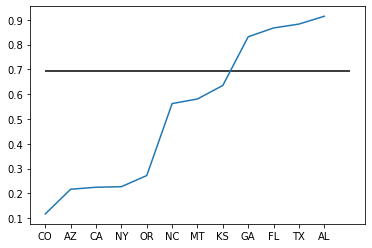

In [ ]:
av = ModelsExperiments[(ModelsExperiments['eval_by']=='National') & (ModelsExperiments['trained_by']=='National')]['f1'].mean()
plt.plot(train_eval_state)
plt.hlines(0.692034193188317,xmin=0,xmax=12)
plt.show()

# Evaluate state using national model

In [ ]:
# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

# remove fill value
FiresNew = Fires[Fires['aet'] != 32768.].copy()

# select features
input_features = ['LATITUDE','LONGITUDE',\
                  'DISCOVERY_MONTH', 'aet', 'pet', 'soil',\
                  'def', 'ppt', 'q',  'vap', 'ws', 'vpd', 'swe'] 
# PDSI, tmax, tmin, srad, 'DAYS_TO_CONT',

states = list(Fires['STATE'].unique())

# model list
models = [LogisticRegression, KNeighborsClassifier, \
          AdaBoostClassifier, RandomForestClassifier, \
          GradientBoostingClassifier, DecisionTreeClassifier] # SVC

# train models
for state in states:
  print(state)

  # split into train and test
  FiresByState = Fires[Fires['STATE'] == state].copy()
  X_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][input_features].copy()
  y_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][output_feature].copy()
  X_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][input_features].copy()
  y_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][output_feature].copy()

  # evaluate national model on each state
  for model in models:
    # timer
    start = time.time()

    # get national model
    clf = ModelsExperiments[(ModelsExperiments['model_type']==str(model)) & \
                            (ModelsExperiments['trained_by']=='National') \
                            ]['model_obj'].iloc[0]

    # make predictions
    y_pred = clf.predict(X_test)

    # evaluate predictions
    f1 = f1_score(y_test,y_pred)
    
    # store results in DataFrame
    row = {'model_type':str(model),'model_obj':clf,'f1':f1,\
           'trained_by':'National','eval_by':state}

    row_df = pd.DataFrame([row],columns=row.keys())
    ModelsExperiments = pd.concat([ModelsExperiments,row_df])

    # print results to output
    print(str(model), 'f1-score: ',f1) 
    end = time.time()
    print('time to train ',str(model),' =',str(end-start))
    print()

CA
<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.4877271278291361
time to train  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.02052474021911621

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.4877659998405994
time to train  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.43096280097961426

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.0
time to train  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.10373401641845703

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.2139261744966443
time to train  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 0.10648703575134277

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.10382361149874406
time to train  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  = 0.02497696876525879

<class 'sklearn.tree._classes.DecisionTreeClassifier'> f1-

In [ ]:
print(str(ModelsExperiments['model_type'].unique()[0]))
print(str(ModelsExperiments['model_type'].unique()[6]))
print(str(ModelsExperiments['model_type'].unique()[0])==str(ModelsExperiments['model_type'].unique()[6]))

LogisticRegression()
LogisticRegression()
True


In [ ]:
eval_by_state_df = ModelsExperiments[(ModelsExperiments['trained_by']=='National') & (ModelsExperiments['eval_by']!='National')].copy()

In [ ]:
eval_by_state = eval_by_state_df.groupby(by='eval_by')['f1'].mean().sort_values()

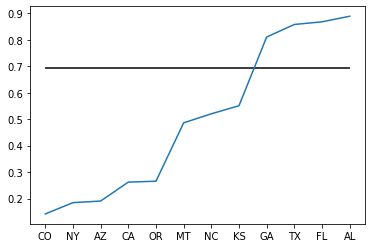

In [ ]:
plt.plot(eval_by_state)
plt.hlines(0.692034193188317,xmin=0,xmax=11)
plt.show()

# National and State Models
- state models work better on GA, FL, TX, AL
- if both models agree, use the agreed value
- if they disagree and are not in above states, then use national model's prediction

In [ ]:
# create output feature
output_feature = 'SmallBig'
Fires['SmallBig'] = np.nan
small = ['A']
big = ['B','C','D','E','F','G']
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(small), 'SmallBig'] = 0
Fires.loc[Fires['FIRE_SIZE_CLASS'].isin(big), 'SmallBig'] = 1

# remove fill value
FiresNew = Fires[Fires['aet'] != 32768.].copy()

# select features
input_features = ['LATITUDE','LONGITUDE',\
                  'DISCOVERY_MONTH','aet', 'pet', 'soil',\
                  'def', 'ppt', 'q',  'vap', 'ws', 'vpd', 'swe'] 
# PDSI, tmax, tmin, srad, 'DAYS_TO_CONT', 

# keep track of experiments
#StateModelsExperiments = pd.DataFrame(columns=['state','type','f1','size','model'])

def combine_pred(npred,spred,state):
  if state in ['GA','FL','TX','AL']:
    # if npred and spred agree, keep value
    # if they disagree, use spred value
    y_pred = np.empty(len(npred))
    for i in range(len(npred)):
      if npred[i] == spred[i]:
        y_pred[i] == spred[i]
      else:
        y_pred[i] == spred[i]
    return y_pred
  else:
    # if npred and spred agree, keep value
    # if they disagree, use npred value
    y_pred = np.empty(len(npred))
    for i in range(len(npred)):
      if npred[i] == spred[i]:
        y_pred[i] == npred[i]
      else:
        y_pred[i] == npred[i]
    return y_pred


states = list(Fires['STATE'].unique())

# model list
models = [LogisticRegression, KNeighborsClassifier, \
          AdaBoostClassifier, RandomForestClassifier, \
          GradientBoostingClassifier, DecisionTreeClassifier] # SVC

# train models
for state in states:
  print(state)

  # split into train and test
  FiresByState = Fires[Fires['STATE'] == state].copy()
  X_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][input_features].copy()
  y_train = FiresByState[FiresByState['FIRE_YEAR'] < 2018][output_feature].copy()
  X_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][input_features].copy()
  y_test = FiresByState[FiresByState['FIRE_YEAR'] == 2018][output_feature].copy()

  # predict using national and state - whichever is better for the state
  for model in models:
    # timer
    start = time.time()

    if state in ['GA','TX','AL','FL']:
      # use state classifier
      clf = ModelsExperiments[(ModelsExperiments['model_type']==model) & \
                              (ModelsExperiments['trained_by']==state)]['model_obj'].iloc[0]
    else:
      # use national classifier
      clf = ModelsExperiments[(ModelsExperiments['model_type']==model) & \
                              (ModelsExperiments['trained_by']=='National') & \
                              (ModelsExperiments['eval_by']=='National')]['model_obj'].iloc[0]
    
    # make predictions
    y_pred = clf.predict(X_test)

    # evaluate predictions
    f1 = f1_score(y_test,y_pred)
    
    # store results
    row = {'model_type':str(model),'model_obj':clf,'f1':f1,\
           'trained_by':'combo','eval_by':state}
    row_df = pd.DataFrame([row],columns=row.keys())
    ModelsExperiments = pd.concat([ModelsExperiments,row_df])

    # print results to ouput
    print(str(model), 'f1-score: ',f1) 
    end = time.time()
    print('time to train ',str(model),' =',str(end-start))
    print()

CA
<class 'sklearn.linear_model._logistic.LogisticRegression'> f1-score:  0.4877271278291361
time to train  <class 'sklearn.linear_model._logistic.LogisticRegression'>  = 0.015186548233032227

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> f1-score:  0.4877659998405994
time to train  <class 'sklearn.neighbors._classification.KNeighborsClassifier'>  = 0.42100024223327637

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> f1-score:  0.0
time to train  <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>  = 0.10187673568725586

<class 'sklearn.ensemble._forest.RandomForestClassifier'> f1-score:  0.2841029256256609
time to train  <class 'sklearn.ensemble._forest.RandomForestClassifier'>  = 0.10830831527709961

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> f1-score:  0.10382361149874406
time to train  <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  = 0.026443004608154297

<class 'sklearn.tree._classes.DecisionTreeClassifier'> f

In [ ]:
combo_eval_df = ModelsExperiments[(ModelsExperiments['trained_by']=='combo') & (ModelsExperiments['eval_by']!='National')].copy()
combo_eval = combo_eval_df.groupby(by='eval_by')['f1'].mean().sort_values()

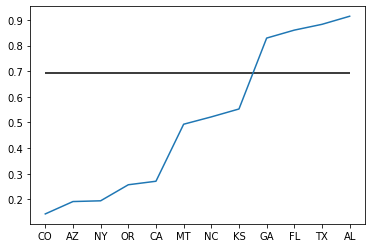

In [ ]:
plt.plot(combo_eval)
plt.hlines(0.692034193188317,xmin=0,xmax=11)
plt.show()

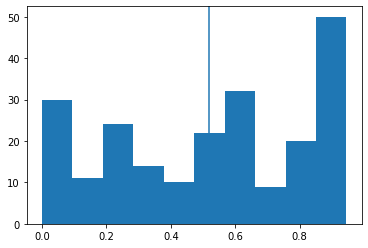

In [ ]:
plt.hist(ModelsExperiments['f1'])
plt.axvline(ModelsExperiments['f1'].mean())

# Southestern States

In [ ]:
Southeast = ['TX','FL','GA','AL']

In [ ]:
np.mean(list(ModelsExperiments[ModelsExperiments['trained_by'].isin(Southeast)].groupby('trained_by')['f1'].mean()))

0.8739744475219949

In [ ]:
ModelsExperiments[ModelsExperiments['trained_by'] == 'National'].groupby('eval_by')['f1'].mean()

eval_by
AL          0.889329
AZ          0.190384
CA          0.262047
CO          0.141727
FL          0.868207
GA          0.810676
KS          0.550899
MT          0.486160
NC          0.520371
NY          0.184358
National    0.693241
OR          0.265353
TX          0.858186
Name: f1, dtype: float64

In [ ]:
len(FiresNew[FiresNew['STATE'].isin(Southeast)])

65799

In [ ]:
len(FiresNew[~FiresNew['STATE'].isin(Southeast)])

95554

In [ ]:
len(FiresNew[FiresNew['STATE'].isin(Southeast)])/len(FiresNew)

0.4077953307344766